# SageMath from inside Jupyter Notebook ()

In [5]:
from scipy.constants import e, k
from pylab import plot, show, xlabel, ylabel, title, grid

## Parameters

In [7]:
q = e
kB = k

# Conditions (Blue solar cell)
Iph = 0.1023 # Amps
I0 = 0.1036E-6 # Amps
n = 1.5019
Rs = 0.06826 # Ohms
Rp = 1000. # Ohms
T = 300. # K

# Calculations
x_axis = []
y_axis = []


## Calculations for blue

In [8]:
for j in range(1001) :
    I = -0.1028+j*0.1028/1000
    y_axis.append(I)
    a = (q/(n*kB*T)) * I0 * Rp
    x = a.log() + (q/(n*kB*T)) * Rp * (I+Iph+I0)
    g = log(lambert_w(x.exp()))
    V=  + I*Rs \
         + ((n*kB*T)/q) * g \
         - ((n*kB*T)/q) * log( (q/(n*kB*T)) * I0 * Rp )
    x_axis.append(V)

## Plots

### Blue

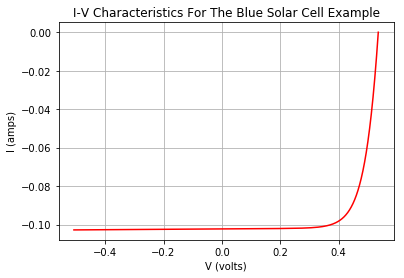

In [9]:
# Ploting
plot(x_axis,y_axis,"r-")
title('I-V Characteristics For The Blue Solar Cell Example')
xlabel('V (volts)')
ylabel('I (amps)')
grid(True)
show()

# Grey

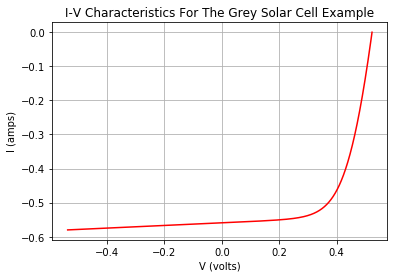

In [7]:
# Conditions (Grey solar cell)
Iph = 0.5610 # Amps
I0 = 5.514E-6 # Amps
n = 1.7225
Rs = 0.07769 # Ohms
Rp = 25.9 # Ohms
T = 307 # K

# Calculations
x_axis = []
y_axis = []

for j in range(1001) :
    I = -0.58+j*0.58/1000
    y_axis.append(I)
    a = (q/(n*kB*T)) * I0 * Rp
    x = a.log() + (q/(n*kB*T)) * Rp * (I+Iph+I0)
    g = log(lambert_w(x.exp()))
    V =  + I*Rs \
         + ((n*kB*T)/q) * g \
         - ((n*kB*T)/q) * log( (q/(n*kB*T)) * I0 * Rp )
    x_axis.append(V)

# Ploting
plot(x_axis,y_axis,"r-")
title('I-V Characteristics For The Grey Solar Cell Example')
xlabel('V (volts)')
ylabel('I (amps)')
grid(True)
show()

# Double diode

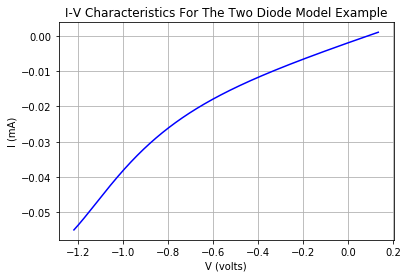

In [10]:
# Parameters
Iph = 4.85e-5 # Amps
I01 = 1.5e-5 # Amps
I02 = 2.4e-7 # Amps
n1 = 2.4
n2 = 9.5
Rs = 0. # Ohms
Rp1 = 1.0e8 # Ohms
Rp2 = 4.6e4 # Ohms
T = 300. # K

# Calculations
x1_axis = []
x2_axis = []
y_axis = []

for j in range(1001) :
    I = -5.5e-5+j*5.6e-5/1000
    y_axis.append(I*1000)
    
    # Original Exact Expression
    z1 = (q/(n1*kB*T)) * I01*Rp1 * ((q/(n1*kB*T))*Rp1*(I+Iph+I01)).exp()
    w1 = lambert_w(z1)
    z2 = q/(n2*kB*T)*I02*Rp2* (-q/(n2*kB*T)*Rp2*(I-I02)).exp()
    w2 = lambert_w(z2)
    V1 = (I+Iph+I01)*Rp1 \
        - (n1*kB*T)/q*w1 \
        + (n2*kB*T)/q*w2 \
        + (I-I02)*Rp2 + I*Rs
    
    # Manipulated Exact Expression
    a1 = q/(n1*kB*T)*I01*Rp1
    x1 = a1.log() + q/(n1*kB*T)*Rp1*(I+Iph+I01)
    g1 = log(lambert_w(x1.exp()))
    a2 = q/(n2*kB*T)*I02*Rp2
    x2 = a2.log() - q/(n2*kB*T)*Rp2*(I-I02)
    g2 = log(lambert_w(x2.exp()))
    V2 = I*Rs \
        + (n1*kB*T)/q*g1 - (n2*kB*T)/q*g2 \
        - (n1*kB*T)/q*(q/(n1*kB*T)*I01*Rp1).log() \
        + (n2*kB*T)/q*(q/(n2*kB*T)*I02*Rp2).log()
    
    x1_axis.append(V1)
    x2_axis.append(V2)

# Ploting
plot(x1_axis,y_axis,"b-")
#plot(x2_axis,y_axis,"r-")
title('I-V Characteristics For The Two Diode Model Example')
xlabel('V (volts)')
ylabel('I (mA)')
grid(True)
show()

